# 10. Filtrado Adaptativo

En breves palabras, un **filtro adaptativo** es un filtro digital FIR o IIR en el cual los coeficientes son modificados recursivamente por un algoritmo automático. Este tipo de filtros es útil en sistemas donde el entorno no puede ser descrito o modelado con precisión. Entre sus principales aplicaciones están: la cancelación de eco usada en telefonía móvil, la ecualización de canales para grabación, la cancelación adaptativa de ruido, la cancelación del efecto de la función de transferencia de un sistema desconocido, también llamado deconvolución, y la compresión de voz, entre otras.

Aunque en principio un filtro adaptativo puede ser FIR o IIR, se escoge el primer tipo de filtro ya que los FIR siempre son estables sin importar la forma sus coeficientes. De esta forma, el filtro adaptativo está formado por un filtro FIR cuyos coeficientes, $w_{n}[k]$ son modificados dinámicamente por medio de un algoritmo que minimiza el error $e[n]$ como se ilustra en la siguiente figura. 

![Filtro adaptativo](../img/cap10_adaptativo.png)

Este error se calcula como la diferencia entre la respuesta deseada $d[n]$ y la salida del filtro FIR $y[n]$. Según esta configuración, un filtro adaptativo tiene dos entradas: la entrada al filtro FIR como tal ($x[n]$) y una señal de entrada deseada ($d[n]$); y una salida del sistema $y[n]$.

En este capítulo utilizaremos la notación $w_{n}[k]$ para referirnos a los coeficientes de la respuesta al impulso en lugar de $b_{k}$ o $h[k]$, ya que ésta es la nomenclatura usual para denotar los filtros adaptativos, puesto que los coeficientes del filtro no son estáticos sino que cambian con el tiempo $n$.

Como se aprecia en la figura, el filtro adaptativo realiza el cálculo de una secuencia de error $e[n]$ dada por: 

$$e[n]=d[n]-y[n]=d[n]-w_{n}[n]\star x[n]$$

o usando la notación vectorial para la convolución del Apéndice C:

$$y[n]=\mathbf{w}^{H}[n]\,\mathbf{x}[n]$$

$$e[n]=d[n]-\mathbf{w}^{H}[n]\,\mathbf{x}[n]$$

donde

$$\mathbf{w}[n]=\left[\begin{array}{c}
w_{n}[0]\\
w_{n}[1]\\
...\\
w_{n}[M-1]
\end{array}\right]$$ 

y  

$$\mathbf{x}[n]=\left[\begin{array}{c}
x[n]\\
x[n-1]\\
...\\
x[n-(M-1)]
\end{array}\right]$$

Puesto que el propósito del algoritmo de adaptación es el ajustar los coeficientes del filtro, se toma como criterio de ajuste la búsqueda del mínimo valor cuadrático medio del error (**MSE**: _Mean-Square Error_). Se usa esta función dado a que el MSE es una función cuadrática que garantiza la existencia de al menos un mínimo: 

$$MSE=\mathcal{E}\left\{ e^{2}[n]\right\}$$ 

Para minimizar el MSE hay propuestos varios algoritmos, siendo el **LMS** (_Least Mean-Square_: mínimos cuadros) el más utilizado debido a su sencillez. Existen otros algoritmos con superior desempeño que emplean otros criterios de minimización diferentes al MSE, como es el caso del **RLS** (_Recursive Least-Square_: mínimos cuadrados recursivos) que será descrito al final de este capítulo.

## 10.1 Configuraciones del filtro adaptativo


Dependiendo de la aplicación, existen dos configuraciones básicas de como “conectar” un filtro adaptativo, en paralelo o serie con un sistema desconocido, como se muestra en la siguiente figura. Para cada una de estas formas, los coeficientes $w_{n}$ a los cuales se ajusta el filtro adquieren un significado diferente como se verá a continuación.

![Conexiones del filtro adaptativo](../img/cap10_conexion_adapt.png)

### 10.1.1 Configuración para identificación de sistemas (paralelo)

En la configuración en **paralelo**, el filtro ajusta sus coeficientes $w_{n}$ a una aproximación a la respuesta al impulso del sistema desconocido, es decir, “**copia el sistema desconocido**”. Matemáticamente esta situación puede ser vista más fácilmente si minimizamos el error $e[n]$ para esta configuración:

$$e[n]=d[n]-y[n]=\left(\mathbf{w}_{0}[n]\right)^{H}\mathbf{x}[n]+u[n]-\mathbf{w}^{H}[n]\mathbf{x}[n]$$

donde $d[n]$ es la salida del sistema desconocido más un ruido aditivo $u[n]$ inherente a la señal de salida. El sistema desconocido se modela a través de una respuesta al impulso denotada por el vector $\mathbf{w}_{0}[n]$. Usaremos esta notación para indicar que el sistema desconocido puede ser variante con el tiempo. Finalmente, $\mathbf{w}[n]$ es el vector correspondiente a la respuesta al impulso del filtro adaptativo. Cuando se minimiza la señal de error, $e[n]\rightarrow0$, nos conduce finalmente a:

$$\mathbf{w}[n]\approx\mathbf{w}_{0}[n]$$

que indica que el filtro adaptativo será una copia aproximada del sistema desconocido.

Entre las aplicaciones de esta configuración está la cancelación de eco, la cancelación de ruido, el modelado de plantas, y la predicción lineal de voz.

### 10.1.2 Configuración para inversión de sistemas (serie)

En esta conexión, el filtro adaptativo se conecta en **serie** con el sistema desconocido. En esta configuración, el filtro ajusta sus coeficientes $w_{n}$ al inverso de los coeficientes del sistema desconocido, es otras palabras, “obtiene la **inversa del sistema desconocido**” o realiza un proceso de “**deconvolución**”.

Al analizar matemáticamente esta conexión, se tiene que

$$e[n]=d[n]-y[n]=d[n]-\mathbf{w}^{H}[n]\mathbf{x}[n]	=	d[n]-\mathbf{w}^{H}[n]\left(\left(\mathbf{w}_{0}[n]\right)^{H}\mathbf{d}[n]+u[n]\right)$$

y después de minimizar el error

$$\mathbf{w}[n]\approx\left(\mathbf{w}_{0}[n]\right)^{-1}$$

Esta configuración es empleada en la deconvolución de sistemas, para eliminar el efecto de la función de transferencia de un sistema desconocido, y en sistemas de ecualización de señales.

## 10.2 Solución Óptima

Anteriormente se mencionó que en la práctica, el filtro adaptativo emplea un algoritmo iterativo (LMS o RLS) que converge a la solución esperada, ya sea, sintonizar el filtro adaptativo a la respuesta al impulso del sistema desconocido o a su inversa, según el tipo de conexión. Es importante conocer entonces la **solución óptima**, es decir, la expresión a la convergería el algoritmo adaptativo de manera ideal después de repetidas iteraciones.

De la expresión del error cuadrático medio se puede derivar la solución óptima del filtro adaptativo, para ello es necesario reescribir el MSE en función de los coeficientes y la señal de entrada:

$$\mathcal{E}\left\{ |e[n]|^{2}\right\} = \mathcal{E}\left\{ e[n]e^{*}[n] \right\} = \mathcal{E}\left\{ (d[n]-\mathbf{w}^{H}[n]\,\mathbf{x}[n]) (d^{*}[n]-\mathbf{x}^{H}[n]\,\mathbf{w}[n]) \right\}$$ 

donde el paso anterior se justifica en el hecho que $|e[n]|^{2} = e[n]e^{*}[n]$ y el error se calcula como la diferencia entre la señal deseada y la salida del filtro adaptativo $e[n]=d[n]-\mathbf{w}^{H}[n]\,\mathbf{x}[n]$.

Después de realizar operaciones algebraicas se llega a

$$ \mathcal{E}\left\{ d[n]d^{*}[n] \right\}  - \mathcal{E}\left\{ d[n]\mathbf{x}^{H}[n]\mathbf{w}[n] \right\}
- \mathcal{E}\left\{ \mathbf{w}^{H}[n]\mathbf{x}[n]d^{*}[n] \right\}
+ \mathcal{E}\left\{ \mathbf{w}^{H}[n] \mathbf{x}[n] \mathbf{x}^{H}[n] \mathbf{w}[n] \right\}$$

donde el término $\mathcal{E}\left\{ d[n]d^{*}[n] \right\}$ es la potencia o varianza de la señal deseada, $\sigma_{d}^{2}$, el término $\mathcal{E}\left\{ \mathbf{x}[n]d^{*}[n]\right\}$ es correlación cruzada entre la señal deseada y la señal de entrada al filtro adaptativo, que se denotará por $\mathbf{d}[n]$, y $\mathcal{E}\left\{\mathbf{x}[n] \mathbf{x}^{H}[n]\right\}$ la matriz de autocorrelación de la señal de entrada, que se denotará por $\mathbf{R}[n]$. Por consiguiente,

$$MSE = \sigma_{d}^{2} -\mathbf{d}^{H}[n]\mathbf{w}[n] -\mathbf{w}^{H}[n]\mathbf{d}[n] + \mathbf{w}^{H}[n]\mathbf{R}[n]\mathbf{w}[n]$$

Finalmente, los coeficientes que minimizan el MSE se obtienen a partir de 

$$ \frac{\partial MSE}{\partial \mathbf{w}^{H}} = 0$$

por lo que usando las expresiones para las derivadas de las ecuaciones lineales del Apéndice C se llega a

$$\mathbf{R}[n] \mathbf{w}[n] = \mathbf{d}[n]$$ 

o sea que los coeficientes óptimos se calculan a través de

$$\mathbf{w}_{0}[n] = \mathbf{R}^{-1}[n] \mathbf{d}[n]$$ 

La expresión anterior muestra que los coeficientes óptimos del filtro adaptativo dependen fuertemente de las estadísticas de la señal de entrada y la correlación entre la señal de entrada y la señal deseada. Es por ello, que en muchos algoritmos iterativos, el comportamiento del filtro adaptativo depende fuertemente del tipo de señal de entrada empleado, obteniéndose resultados diferentes si se usa ruido o una señal de banda limitada como entrada. Asimismo, esta expresión muestra que debe existir una correlación entre la señal de entrada y la entrada deseada. Si no existe correlación, el filtro adaptativo no se puede estabilizar.

La ecuación anterior no es simple de usar en una aplicación real. Para lograr un algoritmo práctico, se han propuesto diferentes estrategias para llegar a la solución óptima, antes calculada, de manera iterativa, empleando un algoritmo que calcula los coeficientes en la iteración $n$ usando los coeficientes de la iteración anterior $n-1$ más una ganancia:

$$coefientes[n] = coeficientes[n-1] + ganancia[n]$$

Entre estos algoritmos se encuentran el LMS y el RLS se presentan a continuación.

## 10.3 Algoritmo LMS

En el algoritmo de adaptación **LMS** (_Least-Mean Square_) o mínimos cuadrados, los coeficientes pasados $\mathbf{w}[n-1]$ del filtro se ajustan cada vez que ingresa una nueva muestra al sistema. Por cada iteración del algoritmo, la cual ocurre a un paso $\mu$ de tiempo, se espera que el nuevo conjunto de coeficientes $\mathbf{w}[n]$ minimice el MSE o error cuadrático medio. Esto se representa matemáticamente como:

$$\frac{\mathbf{w}[n]-\mathbf{w}[n-1]}{\mu}=-\nabla\mathcal{E}\left\{ e^{2}[n]\right\}$$ 

La ecuación anterior se deriva más fácilmente de un análisis gráfico de la siguiente figura.

![Algoritmo LMS](../img/cap10_lms.png)

En esta figura, la superficie representa el error cuadrático medio para un filtro FIR de dos coeficientes $w_{0}$ y $w_{1}$. Por cada par de coeficientes, la función $e^{2}[n]$ toma valores máximos y mínimos, pero existe un único valor mínimo al cual el algoritmo LMS debe converger. Ahora, si el conjunto de valores iniciales $\mathbf{w}[n]$ se ubica en un punto donde $e^{2}[n]$ toma un valor alto, es posible trazar un vector desde este punto hacia el mínimo de la superficie. Este vector, según las relaciones del cálculo vectorial es el menos gradiente de la función de error ($-\nabla f(x,y)$), el cual puede ser evaluado numéricamente de manera muy simple como se mostrará a continuación.

A partir de dicha ecuación, tenemos que el nuevo valor de cada coeficiente está relacionado con su valor actual y el error cuadrático medio del instante en cuestión

$$\mathbf{w}[n]=\mathbf{w}[n-1]-\mu\nabla\mathcal{E}\left\{ e^{2}[n]\right\}$$ 

El término $\nabla\mathcal{E}\left\{ e^{2}[n]\right\}$ se puede simplificar por medio de (Ver Apéndice C):

$$\nabla\mathcal{E}\left\{ e^{2}[n]\right\} =\nabla\mathcal{E}\left\{ d^{2}[n]-2d[n]\mathbf{w}^{H}[n]\,\mathbf{x}[n]+\left(\mathbf{w}^{H}[n]\,\mathbf{x}[n]\right)^{2}\right\} = -2d[n]\mathbf{x}[n]+2\left(\mathbf{w}^{H}[n]\,\mathbf{x}[n]\right)\mathbf{x}[n]$$

y el término entre paréntesis se puede obtener a partir de la definición del error $e[n]=d[n]-\mathbf{w}^{H}[n]\,\mathbf{x}[n]$ como $\mathbf{w}^{H}[n]\,\mathbf{x}[n] = d[n]-e[n]$. Por lo tanto,

$$\nabla\mathcal{E}\left\{ e^{2}[n]\right\} =-2e[n]\,\mathbf{x}[n]$$

lo que finalmente conduce a

$$\mathbf{w}[n]=\mathbf{w}[n-1]+2\mu\,e[n]\,\mathbf{x}[n]$$

Esta ecuación es la que emplea el algoritmo de adaptación LMS para actualizar el valor de los coeficientes. Nótese, que el nuevo valor de los coeficientes $\mathbf{w}[n]$ depende del valor anterior de los coeficientes $\mathbf{w}[n-1]$, de la señal de entrada al filtro $\mathbf{x}[n]$, y del error $e[n]$ en el instante específico de tiempo.

En la práctica, los coeficientes iniciales del filtro se inicializan en cero, pero el valor de $\mu$ es crítico. Entre más pequeño, la solución es más cercana a la respuesta al impulso del sistema desconocido, o a su inversa, según el tipo de configuración, pero el tiempo de convergencia será más lento. Un valor de $\mu$ alto, permite una rápida convergencia al mínimo pero el filtro adaptativo puede ser inestable, es decir, nunca converge a la solución óptima. 

### 10.3.1. Filtrado adaptativo en Python

En el siguiente ejemplo se muestra el efecto del paso $\mu$ en la identificación de un sistema desconocido (conexión en paralelo) que se muestra en la siguiente figura.

![Ejemplo Filtro Adaptativo](../img/cap10_lms_python.png)

En este caso se asume que el sistema desconocido es un filtro FIR cuyos coeficientes son $\mathbf{w}_0 = \left\{  0.3, 0.0, -0.5, 0.2 \right\}$. Este ejemplo emplea la biblioteca **adaptfilt** que se puede instalar en Python con el siguiente comando, y cuya documentación se encuentra en https://pypi.org/project/adaptfilt/.

In [ ]:
# Ejecute esta línea una sola vez para instalar la biblioteca
!pip install adaptfilt

En el diagrama de arriba el recuadro amarillo denota la función ``af.lms`` que se emplea en el ejemplo para calcular el filtro adaptativo como se muestra en el programa en Python a continuación.

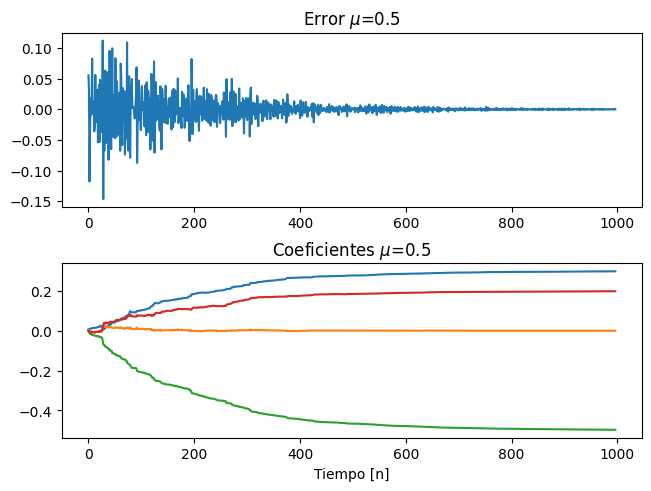

Coeficientes identificados: [ 2.98300731e-01 -2.13994399e-04 -4.97448613e-01  1.98218487e-01]


In [2]:
# Ejemplo 10.1 Filtro adaptativo para identificar un sistema desconocido
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import adaptfilt as af

# Coeficientes del sistema desconocido
w0 = [0.3, 0.0, -0.5, 0.2]

# Crea una señal ruido blanco que se usa como entrada al sistema desconocido y al filtro adaptativo
Nx = 1000
x = np.random.normal(0, 0.1, size=Nx)

# Calcula la señal deseada que no es más que la salida del sistema desconocido
d = sig.lfilter(w0, 1, x)

# Función para graficar la señal de error y los coeficientes
def plotResultsLMS(e, w, mu):
    fig, axs = plt.subplots(2,1,layout='constrained')
    axs[0].plot(e)
    axs[0].set_title(rf"Error $\mu$={mu}")
    axs[1].plot(w)
    axs[1].set_title(rf"Coeficientes $\mu$={mu}")
    axs[1].set_xlabel("Tiempo [n]")
    plt.show()
    print(f"Coeficientes identificados: {w[-1,:]}")

# Calcula el filtro adaptativo para un tamaño de la respuesta al impulso de M=4 y un paso mu=0.5
M = 4
mu = 0.5
y, e, w = af.lms(x, d, M, mu, returnCoeffs=True)
plotResultsLMS(e, w, mu)

Los resultados del ejemplo muestran las capacidades del filtro adaptativo para identificar sistemas, ya que en el último instante de tiempo fue capaz de identificar con precisión los coeficientes del sistema desconocido. 

Como se indicó anteriormente, el parámetro ``mu`` controla la velocidad de adaptación del algoritmo, por ello es interesante analizar su efecto como se muestra en las siguientes figuras.

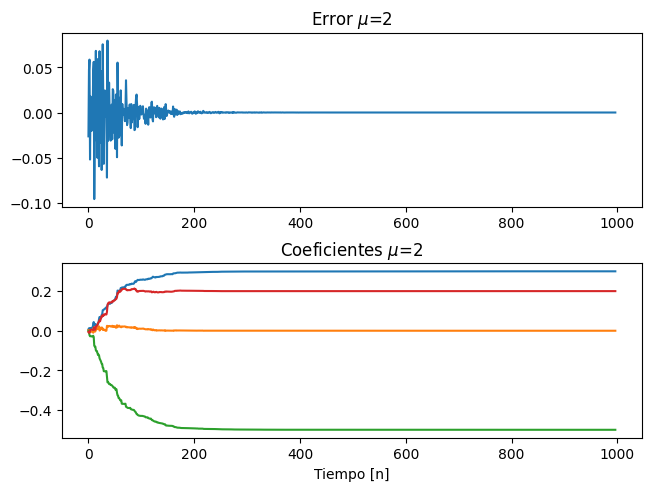

Coeficientes identificados: [ 3.00000000e-01 -8.11233319e-11 -5.00000000e-01  2.00000000e-01]


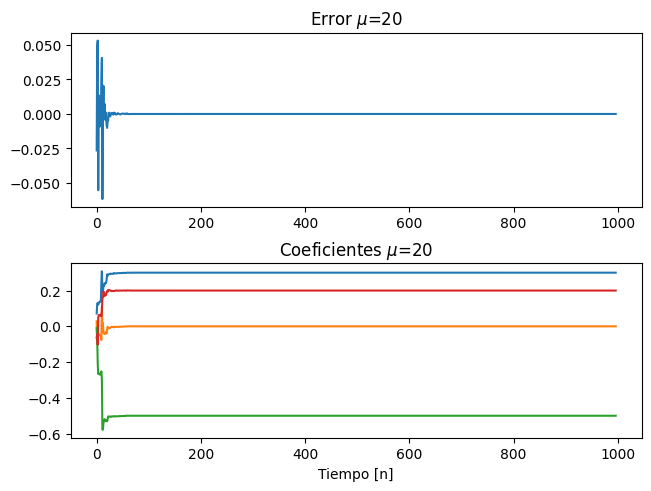

Coeficientes identificados: [ 3.00000000e-01  2.13058543e-18 -5.00000000e-01  2.00000000e-01]


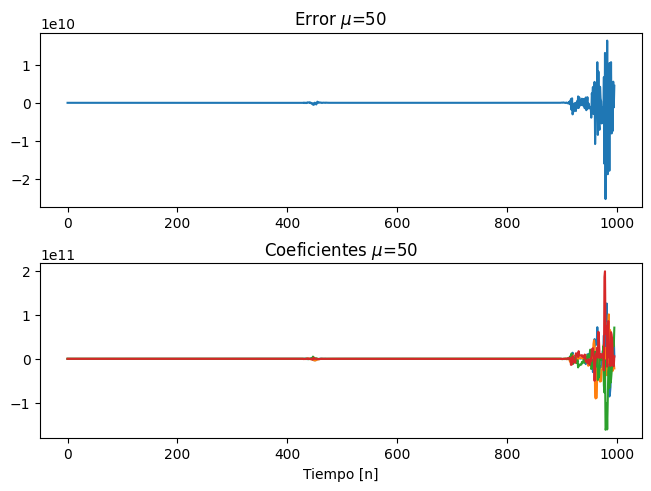

Coeficientes identificados: [ 5.14586431e+09 -2.17728649e+10  7.07842273e+10  5.70653054e+09]


In [3]:
# Calcula el filtro adaptativo diferentes pasos de mu
mu = 2
y, e, w = af.lms(x, d, M, mu, returnCoeffs=True)
plotResultsLMS(e, w, mu)

mu = 20
y, e, w = af.lms(x, d, M, mu, returnCoeffs=True)
plotResultsLMS(e, w, mu)

mu = 50
y, e, w = af.lms(x, d, M, mu, returnCoeffs=True)
plotResultsLMS(e, w, mu)

Se aprecia que usar un paso $\mu$ muy alto permite convergencias rápidas, pero puede conducir a inestabilidades del sistema.

En el ejemplo se empleó la función ``af.lms`` cuya sintaxis es la siguiente:

```Python
y, e, w = af.lms(x, d, M, mu, returnCoeffs=True)
y, e, w = af.lms(x, d, M, mu)
```

En esta función, ``x`` es la entrada al filtro FIR del filtro adaptativo y ``d`` es la entrada deseada (en este ejemplo, la salida del sistema desconocido). ``M`` es la longitud del filtro FIR que empleará el filtro adaptativo para estimar el sistema desconocido, y ``mu`` es el paso de adaptación, cuyo valor, como se mostró en el ejemplo, influye en la velocidad de convergencia del algoritmo de adaptación.

Esta función puede retornar varios valores: la salida del filtro FIR denotada por ``y``, la señal de error, ``e`` o si se le pasa el parámetro ``returnCoeffs=True`` puede retornar una matriz con los coeficientes del filtro adaptativo que se calcularon en cada iteración del algoritmo. Estos coeficientes fueron graficados en el ejemplo anterior para mostrar la evolución del filtro adaptativo. Si el parámetro ``returnCoeffs`` no se especifica o se pone como ``returnCoeffs=False``, la función retorna en ``w`` los coeficientes de la última iteración. 

Nótese del ejemplo anterior, que la evolución de los coeficientes sigue el mismo patrón de la señal de error. Por esta razón, para efectos prácticos se suele graficar la señal de error como indicador de que tan bien es la adaptación y para medir la velocidad de convergencia del algoritmo.  

#### Para Reflexionar

* En el ejemplo se asumió un M=4 porque se conocía a priori que el número de coeficientes del sistema desconocido era 4. Sin embargo, en la práctica. no es posible conocer esta información. ¿Qué pasa si se asume un valor más grande de M=4 en filtro adaptativo? ¿Qué pasa si se asume un valor más pequeño de M=4? ¿Cómo son los coeficientes estimados por el filtro adaptativo? Modifique el valor de M en el código del ejemplo para analizar sus respuestas.

* En el ejemplo se asumió un caso ideal donde el sistema desconocido era fijo e invariable con el tiempo, pero en muchas aplicaciones este sistema desconocido es variante con el tiempo. Suponga que en el sistema desconocido del ejemplo, el coeficiente $w[1]$ varía con el tiempo con una forma senoidal. Analice las capacidades del filtro adaptativo para seguir el sistema desconocido. Para ello, cambie en el ejemplo el código que calcula la señal deseada $d[n]$ por el siguiente código en Python: 

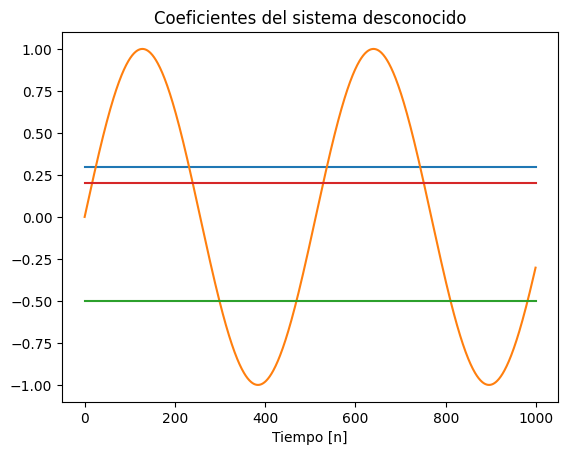

In [4]:
# Calcula la señal deseada empleando un sistema desconocido que es variante en el tiempo
w0 = np.array([[0.3], [0.0], [-0.5], [0.2]]) * np.ones((1,Nx))  # Coeficientes del sistema desconocido
w0[1,:] = np.sin( np.arange(0,Nx) * np.pi/256 )  # El coeficiente w0[1] tendrá una variación senoidal

Nh = len(w0)    
d = np.zeros(Nx)
x_filt = np.concatenate((np.zeros(Nh-1),x))
for n in range(Nx):     #Ciclo for que calcula la convolución orientada a bloques para un sistema variante en el tiempo
    d[n] = np.sum( x_filt[n:n+Nh] * np.flip(w0[:,n])) 

# Grafica los coeficientes del sistema desconocido variante en el tiempo
fig, axs = plt.subplots()
axs.plot(w0.T)
axs.set_title("Coeficientes del sistema desconocido")
axs.set_xlabel("Tiempo [n]")
plt.show()

* El ejemplo asumió también que el sistema desconocido era un filtro FIR, pero en la naturaleza, los sistemas generalmente tienen respuestas infinitas al impulso, es decir, se comportan como sistemas IIR. Analice el comportamiento del filtro adaptativo para un filtro IIR. En este caso, en lugar de comparar los coeficientes del filtro IIR y el filtro adaptativo, se recomienda que compare las respuestas en frecuencia del sistema desconocido y la última respuesta en frecuencia del filtro adaptativo. Puede calcular la respuesta en frecuencia del filtro adaptativo usando el comando ``sig.freqz`` sobre el los últimos coeficientes ``w[-1,:]``

### 10.3.2. Selección del paso $\mu$

Para evitar la inestabilidad debe tenerse en cuenta que el paso $\mu$ puede tomar un valor máximo dado por el siguiente criterio:

$$0\leq\mu\leq\frac{2}{M\,\sigma_{x}^{2}}$$

donde $M$ es el orden del filtro, y $\sigma_{x}^{2}$ la desviación estándar de los valores de la señal de entrada. 

Puesto que habitualmente se trabaja con implementaciones en punto fijo, donde la aritmética se realiza con cantidades finitas y cuantizadas, es muy probable que los coeficientes que ajusta el algoritmo saturen el sistema como consecuencia del desborde de las operaciones. Cuando se presenta saturación en un filtro adaptativo, la única de forma de salir de esta condición de inestabilidad es reiniciando a cero los coeficientes $w$. El valor de $\mu$  está altamente ligado a esta saturación. Si bien se había dicho que un menor de valor de $\mu$ mejoraba el grado de precisión de un filtro adaptativo, en un filtro real escoger un $\mu$ demasiado pequeño aumenta la posibilidad de saturación e inestabilidad. Así pues, en la práctica, $\mu$ tiene un valor mínimo diferente de cero. Un análisis detallado de la inestabilidad en filtros adaptativos está fuera del alcance de este libro, por lo tanto, se sugiere consultar las referencias.

### 10.3.3 Estructura del algoritmo

Para la implementación del filtro adaptativo en un sistema embebido, usando el algoritmo LMSm, se deben realizar los siguientes pasos:

1. Calcular la salida $y[n]$ del filtro FIR, por medio de la convolución entre los coeficientes $\mathbf{w}[n]$ actuales y la entrada $\mathbf{x}[n]$. Este paso se realiza usando alguna de los métodos estudiados en el Capítulo 3.

2. Calcular el error $e[n]$ para el instante de tiempo específico $e[n]=d[n]-y[n]$. Debe tenerse en cuenta que para $d[n]$ y $y[n]$ solamente se almacena el valor actual.

3. Recalcular los nuevos coeficientes del filtro $\mathbf{w}[n]$, por medio de $\mathbf{w}[n]=\mathbf{w}[n-1]+2\mu\,e[n]\,\mathbf{x}[n]$. Esta ecuación puede ser implementada en lenguaje C a través del siguiente fragmento de código:


```C
for (i=0; i<M; i++) { //M = Número de Coeficientes del filtro 
   w[i] = w[i] + m * e * x[i];    //La constante m incorpora el término 2*mu 
}
```

Por lo tanto, este algoritmo resulta muy simple de implementar en la práctica y de allí que sea uno de los más utilizados en sistemas de baja capacidad de cómputo.

## 10.4 Variantes del LMS

A partir del algoritmo LMS convencional, descrito en las secciones anteriores, se han planteado diferentes estrategias y algoritmos que permiten eliminar, o por lo menos reducir, las inestabilidades, tiempo de convergencia y problemas de implementación de dicho método.

### 10.4.1. LMS Leaky

Esta variante del algoritmo LMS permite evitar problemas de saturación e inestabilidad, a costa del incremento en la complejidad del algoritmo. En este algoritmo, los coeficientes $\mathbf{w}[n]$ se calculan a través de:

$$\mathbf{w}[n]=(1-\mu\,\alpha)\,\mathbf{w}[n-1]+2\mu\,e[n]\,\mathbf{x}[n]$$

donde la expresión $(1-\mu\,\alpha)$ se denomina factor de “goteo” (_leakage_) y toma los valores de 0 (sin goteo) hasta 1. La principal ventaja de este algoritmo es su estabilidad en implementaciones de punto fijo. El precio que se paga por la estabilidad es que el algoritmo se acerca pero nunca converge a la solución óptima.

En la función ``lms`` de la biblioteca **adaptfilt** de Python, es posible especificar este factor en el parámetro ``leak`` como se muestra a continuación:

```Python
y, e, w = af.lms(x, d, M, mu, leak=0.7)
y, e, w = af.lms(x, d, M, mu, leak=0.4, returnCoeffs=True)
```

### 10.4.2. LMS Normalizado

Para mejorar la estabilidad y el tiempo de convergencia, se toma el parámetro $\mu$ como una función dependiente del tiempo $n$:

$$\mu[n]=\frac{a}{var[n]}$$

donde $var[n]$ es un estimativo de la potencia promedio (o varianza) de la señal. En esta ecuación $a$ toma generalmente el valor de $a=\frac{2}{M\,\sigma_{x}^{2}}$ y la función $var[n]$ se calcula a través de:

$$var[n]=(1-b)\,var[n-1]+b\,x^{2}[n]$$

siendo $b$ un parámetro de suavizado contenido en el rango $0<b<1$. Con el fin de implementar eficientemente el algoritmo, $b$ se toma potencia de dos $b=2^{-m}$, con el fin de que el cálculo de los coeficientes se resuma en corrimientos hacia la derecha.

Este filtro adaptativo se encuentra implementado en la biblioteca **adaptfilt** de Python a través de la función ``nlms`` cuyo formato es: 

```Python
y, e, w = af.nlmsru(x, d, M, mu)
y, e, w = af.nlmsru(x, d, M, mu, returnCoeffs=True)
y, e, w = af.nlmsru(x, d, M, mu, leak=0.7)
```

Donde los parámetros tienen el mismo significado que para el algoritmo LMS. Nótese que este método también soporta factor de goteo como en el LMS Leaky.

### 10.4.3. LMS Sign

En este algoritmo, los coeficientes $\mathbf{w}[n]$ son evaluados por medio de:

$$\mathbf{w}[n]=\mathbf{w}[n-1]+\mu\,signo\left(e[n]\right)\,\mathbf{x}[n]$$

siendo,

$$signo[n]=\left\{ \begin{array}{c}
1\\
0\\
-1
\end{array}\,\,\,\begin{array}{c}
x>0\\
x=0\\
x<0
\end{array}\right.$$

Este esquema permite reducir el número de multiplicaciones involucradas en cada iteración, pero tiene un tiempo de convergencia muy lento.

#### Para Reflexionar

* En el Ejemplo 10.1 se asumió que la señal de entrada era ruido blanco lo cual facilitaba la adaptación del filtro adaptativo ya que esta señal contiene todas las componentes de frecuencia, pero en muchas aplicaciones no es posible emplear esta señal sino señales de banda limitada como la voz (por ejemplo, en aplicaciones de cancelación de eco). Analice en el Ejemplo 10.1 el efecto de entrenar un filtro adaptativo empleando el algoritmo LMS y NLMS usando una señal de ruido blanco y una señal de voz de un archivo pregrabado. ¿Qué ventajas tiene el algoritmo NLMS para este tipo de señales?

## 10.5 Aplicaciones

Como se comentó anteriormente, la configuración en paralelo (identificación de sistemas) permite emplear el filtrado adaptativo para identificar sistemas, siendo útil en aplicaciones de cancelación de eco y ruido, o en el modelamiento de sistemas. Por su parte, la configuración en serie, permite hacer deconvolución de sistemas, siendo su principal aplicación la ecualización de señales.

### 10.5.1. Deconvolución de sistemas

Un uso típico de la deconvolución, es la eliminación del efecto de la función de transferencia de un sistema desconocido. Por ejemplo, cuando se emplea un transductor para realizar alguna medición, la señal entregada está supeditada al efecto de la respuesta del sensor. Si dicha respuesta se puede modelar por medio de un sistema LTI, este efecto puede eliminarse al pasar la señal entregada por el transductor por un filtro inverso. Para el filtro inverso se puede emplear un filtro adaptativo tal como se ilustra en la siguiente figura. 

![Aplicación 1-Filtrado adaptativo](../img/cap10_app_adapt1.png)

En este esquema, los coeficientes del filtro adaptativo se sintonizan solo cuando se aplica la señal de referencia al sistema. Una vez entrenado el sistema, el algoritmo de adaptación no debe funcionar y el filtro adaptativo se comportará exclusivamente como un filtro FIR.

### 10.5.2. Ecualización de señales

Otra aplicación de la conexión en serie es un esquema típico para la ecualización de señales mostrado en la siguiente figura.

![Aplicación 2-Filtrado adaptativo](../img/cap10_app_adapt2.png)

Nótese que a diferencia de la estructura básica en serie comentada en la Sección 10.1, el filtro adaptativo se ubica antes del sistema desconocido. Es así como, al transmisor o sistema de grabación se le aplica una versión modificada $y[n]$ de la señal original $x[n]$, de tal forma que, cuando la señal pasa por el medio de transmisión o sistema de grabación, llega idéntica a su destino. A diferencia con el sistema de la Sección 10.3.1, el ecualizador no requiere entrenamiento y en su lugar, el algoritmo de adaptación siempre trabaja.

### 10.5.3. Cancelación de eco

En la siguiente figura se ilustra la disposición en bloques de un sistema de cancelación de eco empleado en sistemas de telefonía. 

![Aplicación 3-Filtrado adaptativo](../img/cap10_app_adapt3.png)

En estos sistemas se emplea un circuito denominado híbrido que combina las señales transmitida y recibida por un mismo par de líneas. Cuando la señal $v[n]$ se transmite a través del híbrido, parte de esta señal se induce sobre la señal recibida $r[n]$. Es así como, $r[n]$ será igual a la señal transmitida por el usuario del otro abonado más una señal $q[n]=h_{via\,eco}[n]\star v[n]$, que corresponde a la incorporación de eco sobre el canal recibido. Para eliminar la componente $q[n]$ se emplea un filtro adaptativo, el cual se sintonizará a la respuesta al impulso de la vía de eco, de tal forma que la señal de error $e[n]$ corresponderá a una señal libre de eco. Esta es una aplicación interesante en la que la salida útil del sistema es la señal de error.

### 10.5.4. Cancelación adaptativa de ruido

En la siguiente figura se muestra otra aplicación de la configuración para identificación de sistemas, llamada cancelación adaptativa de ruido. 

![Aplicación 4-Filtrado adaptativo](../img/cap10_app_adapt4.png)

En esta aplicación, para suprimir el ruido, el filtro adaptativo genera a su salida un estimativo de ruido que es restado a la señal contaminada, y por tanto, la señal de error $e[n]$ será la señal filtrada libre de ruido. En ciertas aplicaciones, el ruido de referencia se obtiene por medios alternativos de medición. Por ejemplo, para reducir el ruido producido por un ventilador, se puede ubicar un transductor (micrófono o sensor por efecto hall) a la salida del ventilador. En otras aplicaciones, el ruido se puede determinar en aquellos segmentos donde existe exclusivamente ruido, para ello se emplean algoritmos de detección de actividad de la señal principal. En el caso de voz, estos detectores se conocen con el nombre de **VAD** (_Voice Activity Detector_).

### Para Reflexionar

* Realice el diseño de un sistema de cancelación de eco como se mostró en la Sección 10.5.3 y verifique su solución empleando señales de entrada que sean archivos de audio. 

* Una compañía dedicada al alquiler de equipos de audio para conciertos necesita construir un sistema de ecualización automática. Para conseguir su objetivo, coloca un micrófono con la respuesta en frecuencia mostrada en la Figura. El propósito del sistema es adecuar las componentes la señal de salida de los parlantes de tal forma que al llegar al espectador (ubicado en el sitio donde está el micrófono) le lleguen correctamente, es decir, eliminar el efecto de la función de transferencia del medio.

![Problema de Ecualización de señales](../img/cap10_reto_ecualizador.png)

## 10.6 Algoritmo RLS

En el algoritmo LMS se emplea como función de minimización el error cuadrático medio MSE instantáneo, es decir, el error del instante de tiempo actual. Para mejorar la velocidad de convergencia y la calidad de la solución, el algoritmo de mínimos cuadrados recursivos (**RLS**: _Recursive Least-Square_) minimiza es el promedio ponderado de los MSE pasados: 

$$E[n]=\sum_{j=0}^{n}\lambda^{n-j}\left|e[j]\right|^{2}=\sum_{j=0}^{n}\lambda^{n-j}\left|d[j]-\mathbf{w}^{H}[n]\mathbf{x}[j]\right|^{2}$$

donde $\lambda$ se denomina **factor de olvido** (_forgetting factor_) que toma valores entre $0 \leq \lambda \leq 1$. El término $\lambda^{n-j}$ describe la forma como se realiza la ponderación de los errores pasados como se muestra en la siguiente figura.

![Factor de olvido en RLS](../img/cap10_rls_forgetting.png)

Nótese que si $\lambda=1$ la memoria es infinita, pero si $\lambda<1$, la memoria es decreciente, por esta razón el factor de olvido generalmente se escoge como un valor cercano a 1, típicamente $\lambda = 0.95$.

Con esta función de costo se deriva el algoritmo RLS, cuya demostración no se incluye en este documento. Como resultado, el algoritmo RLS involucra los siguientes pasos:

1.	Inicializar el algoritmo con:   
$$\mathbf{w}[-1]=0$$
$$\mathbf{P}[-1]=\delta^{-1}\mathbf{I}$$

donde $\delta$ es una constante positiva pequeña, generalmente es igual a $0.001 \sigma_{x}^{2}$.

2.	Calcular la ganancia de adaptación por medio de las ecuaciones):  
 
$$\bar{\mathbf{g}}[n]=\mathbf{P}[n-1]\mathbf{x}[n]$$

$$\alpha[n]=\lambda+\bar{\mathbf{g}}^{H}[n]\mathbf{x}[n]$$

$$\mathbf{g}[n]=\frac{\bar{\mathbf{g}}[n]}{\alpha[n]}$$

$$\mathbf{P}[n]=\lambda^{-1}\left\{\mathbf{P}[n-1]-\mathbf{g}[n]\bar{\mathbf{g}}^{H}[n]\right\}$$
 
3.	Calcular la salida instantánea 

$$y[n]=\mathbf{w}^{H}[n-1]\mathbf{x}[n]$$

4.	Calcular el error entre la señal deseada y la salida del filtro  

$$e[n]=d[n]-y[n]$$

5.	Actualizar los coeficientes con

$$\mathbf{w}[n]=\mathbf{w}[n-1]+\mathbf{g}[n]e^{*}[n]$$

A pesar de la complejidad de este algoritmo, el RLS tiene la ventaja frente al LMS en que el tiempo de convergencia es independiente de la forma de la señal de entrada. En el LMS, el tiempo de convergencia cambia drásticamente para dos tipos diferentes de señales de entrada. 

Otras características del RLS son:

* La matriz $\mathbf{P}[n]$ es simétrica, por lo cual se puede incrementar la velocidad del algoritmo calculando solamente la parte triangular superior y por simetría generar la otra parte de la matriz. Además de mejorar la velocidad, esto permite reducir los efectos de cuantización del algoritmo con palabras de longitud finita.

* Se ha demostrado que en aritmética de precisión finita el algoritmo es estable para $\lambda<1$ y diverge para $\lambda=1$.

* El algoritmo tiene un problema cuando cesa la señal de entrada, es decir cuando $x[n]=0$, pues la recursión $\mathbf{P}[n]=\lambda^{-1}\left\{\mathbf{P}[n-1]-\mathbf{g}[n]\bar{\mathbf{g}}^{H}[n]\right\}$ diverge para $\lambda<1$. Como se ha visto, el método requiere que $\lambda<1$, por lo que se debe tener la precaución de nunca hacer la entrada completamente cero.

*	Como lo ideal es trabajar con $0<\lambda<1$, se escoge típicamente el rango $0.95<\lambda<1$. 

Este procedimiento se incluye en la función ``rls`` de la biblioteca **adaptfilt** de Python cuya sintaxis es la siguiente.

```Python
y, e, w = af.rls(x, d, M, ffactor)
y, e, w = af.rls(x, d, M, ffactor, returnCoeffs=True)
```

Cuyos parámetros son idénticos al LMS, con excepción de ``ffactor`` que en este caso es el factor de olvido que toma valores entre $[0,1]$ como se indicó anteriormente.

#### Para Reflexionar

* Analice el efecto del algoritmo RLS sobre el Ejemplo 10.1 empleando dos tipos de señal de entrada: ruido blanco y una señal de audio. ¿Cómo es el desempeño del RLS comparado con el LMS y NLMS?

* Si el sistema desconocido es variante con el tiempo, ¿Qué tan bueno es el RLS en hacer el seguimiento a estos sistemas? 